Importing the libraries

In [ ]:
!pip3 install catboost
!pip3 install lightgbm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.1 MB/s eta 0:00:00


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import seaborn as sns
from catboost import CatBoostClassifier, Pool
import xgboost as xgb
from scipy.stats import randint as sp_randint
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import StandardScaler

Importing the Dataset and setting up the Dataframe

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jmuradyann/mlp/main/train.csv")

## INSPECTION

We can start looking at each of the variables seperately and how they are distributed. Moreover we would like to see how they are correlated.

In [ ]:
# We have a good overview of each variable
df.describe()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,112500.000000,9.031300e+04,112500.000000,112500.000000,112500.000000,112500.000000,109555.000000
mean,56249.500000,0.066844,6.264202,52.468098,0.421351,353.833079,6.328072e+03,8.462951,0.266764,1.018231,0.240676,0.757665
std,32476.096979,0.249754,259.629816,14.799413,4.196450,2153.220951,1.413414e+04,5.150260,4.173038,1.133211,4.158755,1.114824
min,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28124.750000,0.000000,0.029678,41.000000,0.000000,0.175078,3.227141e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,56249.500000,0.000000,0.153517,52.000000,0.000000,0.366299,5.112462e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,84374.250000,0.000000,0.558305,63.000000,0.000000,0.857619,7.812482e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,112499.000000,1.000000,50708.000000,103.000000,98.000000,329664.000000,2.866006e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [ ]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,0.0,0.034949,59.0,0.0,0.004933,7959.688894,5.0,0.0,0.0,0.0,0.0
1,1,0.0,0.155308,47.0,0.0,881.000000,NaN,6.0,0.0,1.0,0.0,0.0
2,2,0.0,0.165166,62.0,1.0,0.020327,2851.722407,8.0,0.0,0.0,0.0,0.0
3,3,0.0,0.010886,61.0,0.0,0.642979,1115.657341,6.0,0.0,1.0,0.0,0.0
4,4,0.0,0.000717,49.0,0.0,3603.000000,NaN,15.0,0.0,3.0,0.0,0.0


In [ ]:
df.info()
# The train dataset presents itself with a total of 112,500 entries and 12 columns/features
# The column unnamed could be cleaned up for consistency and readability.
# Some columns have missing values (MonthlyIncome and NumberOfDependents) so we have to deal with them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112500 entries, 0 to 112499
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            112500 non-null  int64  
 1   SeriousDlqin2yrs                      112500 non-null  float64
 2   RevolvingUtilizationOfUnsecuredLines  112500 non-null  float64
 3   age                                   112500 non-null  float64
 4   NumberOfTime30-59DaysPastDueNotWorse  112500 non-null  float64
 5   DebtRatio                             112500 non-null  float64
 6   MonthlyIncome                         90313 non-null   float64
 7   NumberOfOpenCreditLinesAndLoans       112500 non-null  float64
 8   NumberOfTimes90DaysLate               112500 non-null  float64
 9   NumberRealEstateLoansOrLines          112500 non-null  float64
 10  NumberOfTime60-89DaysPastDueNotWorse  112500 non-null  float64
 11  

In [ ]:
# drop unnamed: 0
df.drop(labels = 'Unnamed: 0', axis = 1, inplace = True)

In [ ]:
# SeriousDlqin2yrs Analysis
df['SeriousDlqin2yrs'].value_counts()/len(df)
# The target class is really unbalanced where just around 6.7% of the sample defaults.

SeriousDlqin2yrs
0.0    0.933156
1.0    0.066844
Name: count, dtype: float64

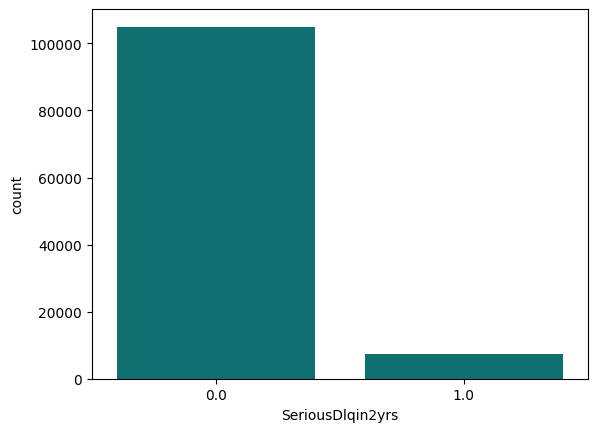

In [ ]:
# Countplot for 'SeriousDlqin2yrs' and we can see clearly how much it is imbalanced.
plt.clf()
sns.set_palette(sns.color_palette(["teal", "red"]))
sns.countplot(x='SeriousDlqin2yrs', data=df)

plt.show()


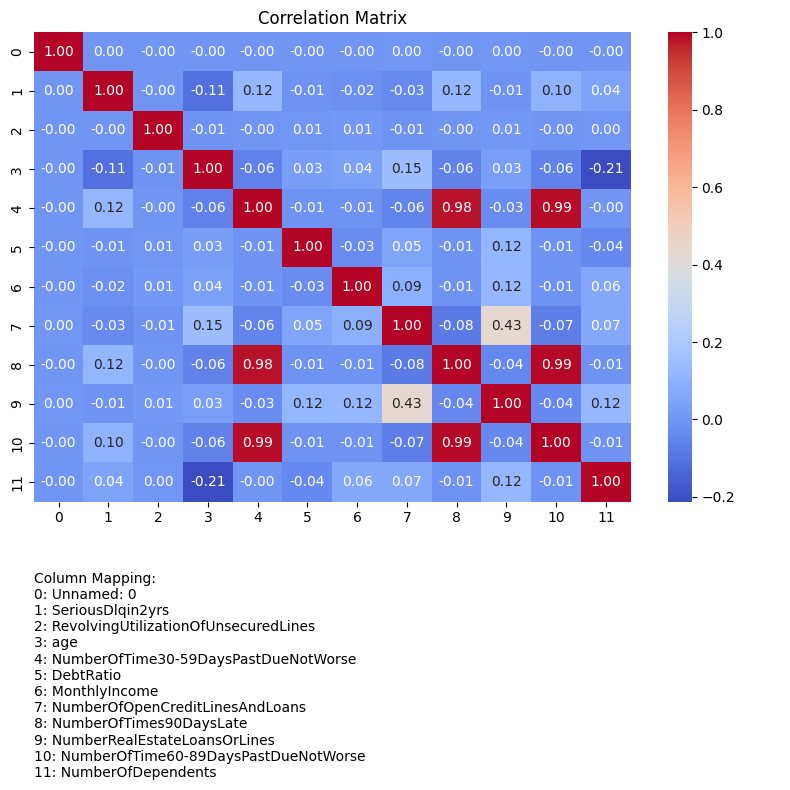

In [ ]:
# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Create a dictionary mapping column names to numbers
col_dict = {col: i for i, col in enumerate(df.columns)}

# Replace column names with numbers in the correlation matrix
correlation_matrix.columns = correlation_matrix.columns.to_series().map(col_dict)
correlation_matrix.index = correlation_matrix.index.to_series().map(col_dict)

# Create the column mapping text
col_mapping_text = "\n".join([f"{num}: {col}" for col, num in col_dict.items()])

# Create a grid for the subplots
fig = plt.figure(figsize=(8, 8))  # Make the figure taller
gs = gridspec.GridSpec(2, 1, height_ratios=[15, 1])  # Adjust the height ratios

# Plot the correlation matrix on the first subplot
ax0 = plt.subplot(gs[0])
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", ax=ax0)
ax0.set_title('Correlation Matrix')

# Add the column mapping text to the second subplot
ax1 = plt.subplot(gs[1])
ax1.axis('off')
ax1.text(0, 0, "Column Mapping:\n" + col_mapping_text, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()


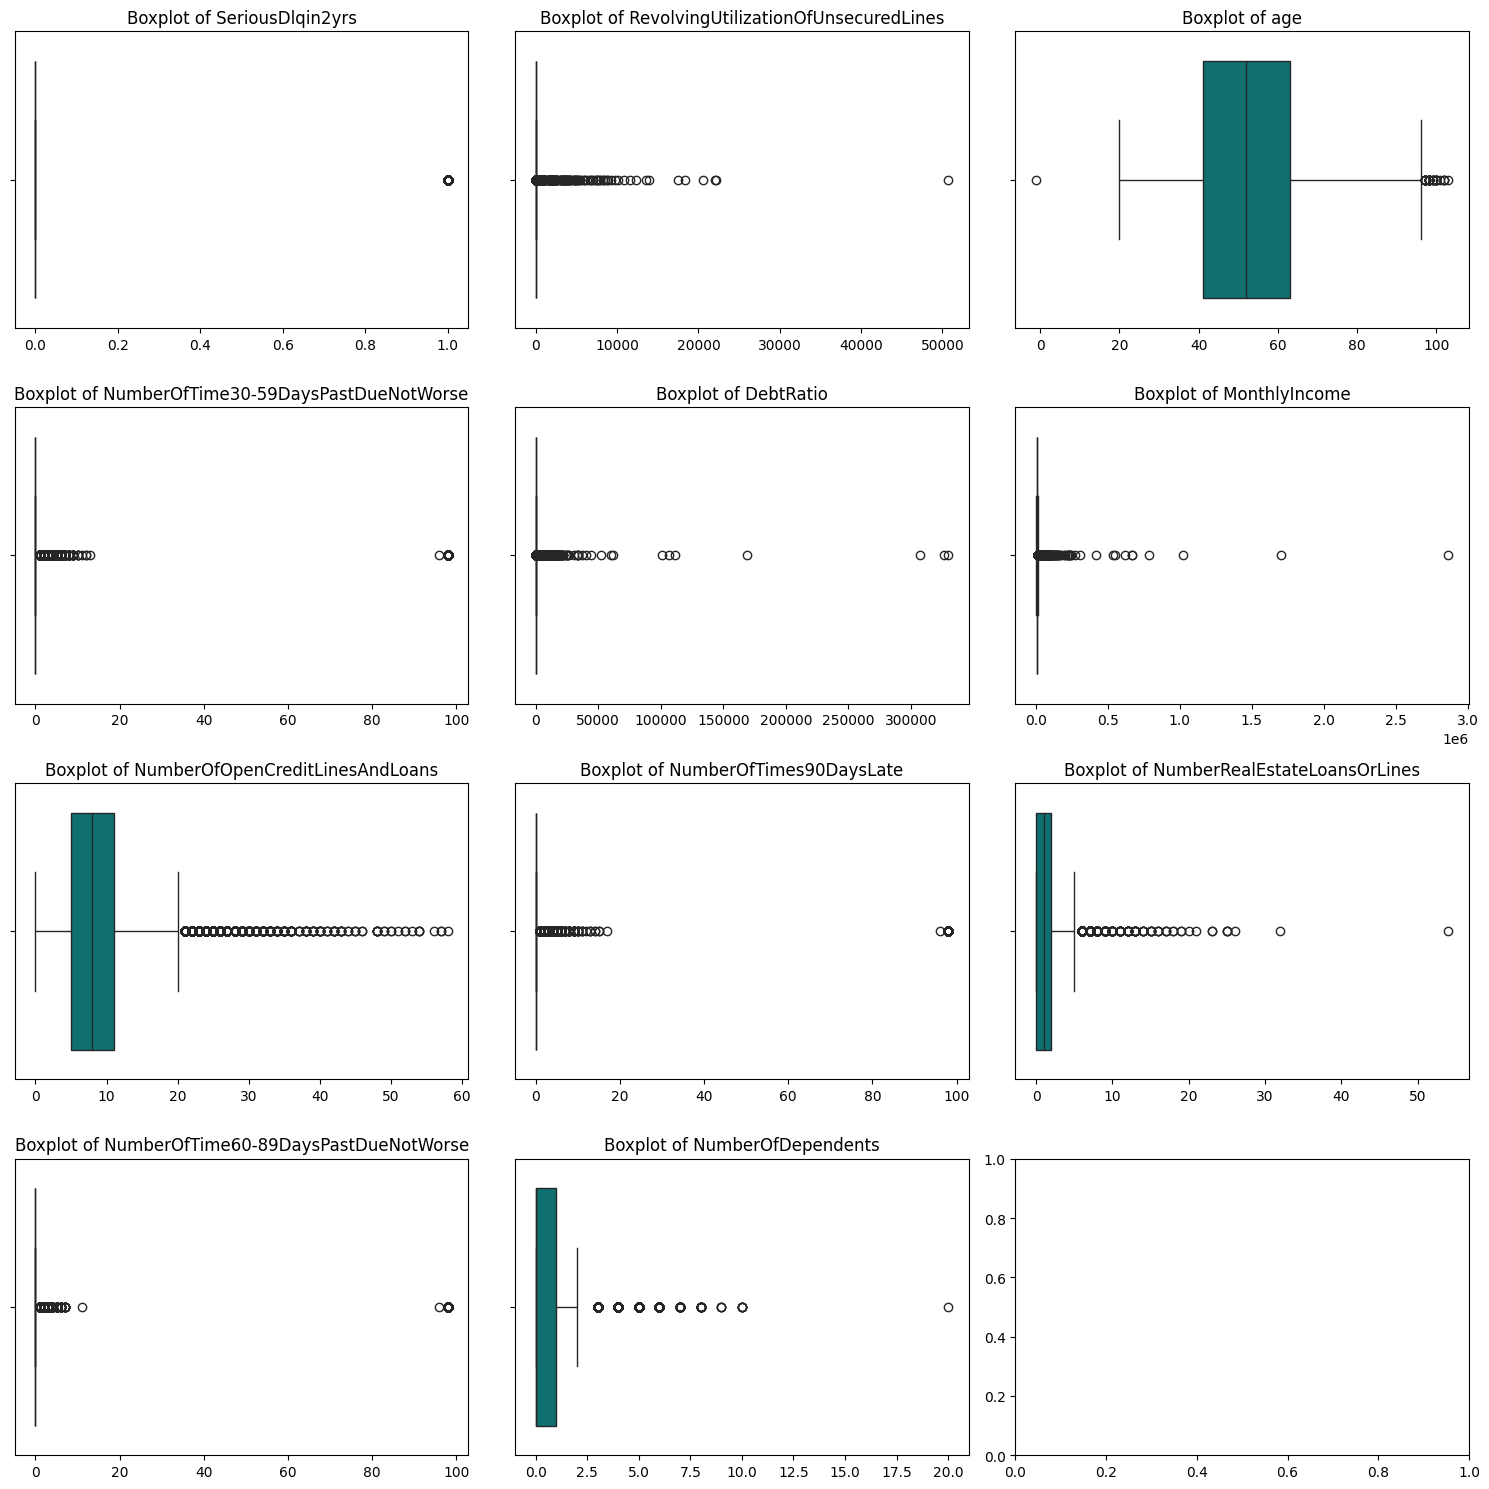

In [ ]:
# Plot boxplots for each variable
# We can notice that for most of the variables there are significant outliers that have very huge values.

# Create subplots for box plots
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy indexing
axes = axes.flatten()

# Loop through each numeric column and create box plots
for i, column in enumerate(df.columns):
    sns.boxplot(x=df[column], ax=axes[i])
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel('')  # Remove x-axis label to avoid overlap


plt.tight_layout()
plt.show()

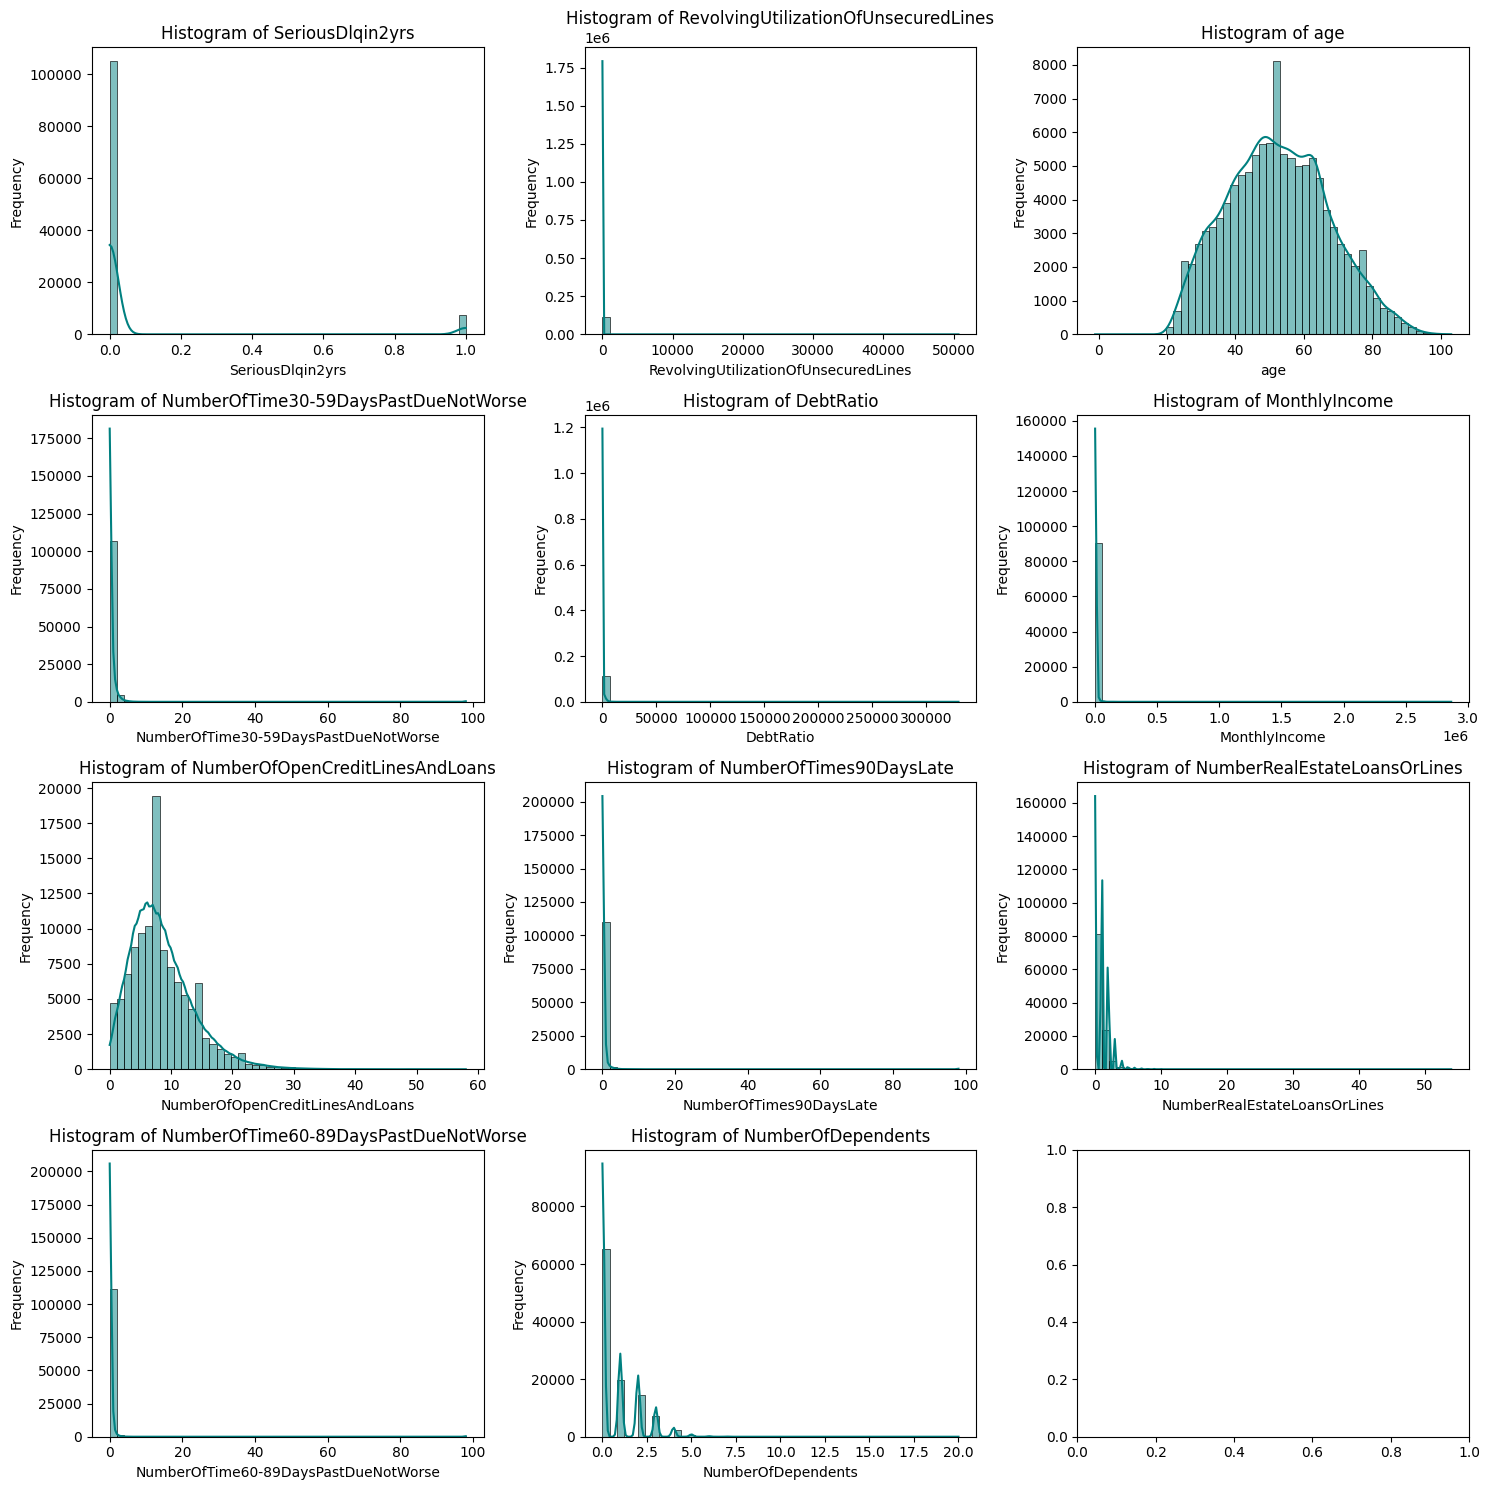

In [ ]:
# Create subplots for histograms with KDE
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    sns.histplot(data=df, x=column, bins=50, kde=True, color='teal', edgecolor='black', ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
# "age" outlier
df[df['age'] < 19]
# we noticed that there is this outlier with age -1 which is impossible.

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
5005,0.0,1.0,-1.0,1.0,0.436927,5620.915291,6.0,0.0,2.0,0.0,2.0


In [ ]:
df_age = df[df['age'] > 52.468098]
print(df_age['SeriousDlqin2yrs'].value_counts() / len(df_age))

SeriousDlqin2yrs
0.0    0.958354
1.0    0.041646
Name: count, dtype: float64


In [ ]:
df_age = df[df['age'] < 52.468098]
print(df_age['SeriousDlqin2yrs'].value_counts() / len(df_age))

SeriousDlqin2yrs
0.0    0.909105
1.0    0.090895
Name: count, dtype: float64


In [ ]:
# Count occurrences of each value for each variable for delay payments
due_30_59 = df['NumberOfTime30-59DaysPastDueNotWorse'].value_counts().sort_index().rename('30-59days')
due_60_89 = df['NumberOfTime60-89DaysPastDueNotWorse'].value_counts().sort_index().rename('60-89days')
due_90 = df['NumberOfTimes90DaysLate'].value_counts().sort_index().rename('90days')

# Create DataFrames for each variable
due_30_59_df = pd.DataFrame(due_30_59)
due_60_89_df = pd.DataFrame(due_60_89)
due_90_df = pd.DataFrame(due_90)

# Concatenate the DataFrames horizontally
merged_counts = pd.concat([due_90_df, due_60_89_df, due_30_59_df], axis=1)

print(merged_counts)

      90days  60-89days  30-59days
0.0   106204   106775.0    94474.0
1.0     3956     4330.0    12077.0
2.0     1170      828.0     3447.0
3.0      516      241.0     1330.0
4.0      230       78.0      535.0
5.0       89       27.0      252.0
6.0       59       11.0      104.0
7.0       27        7.0       41.0
8.0       15        NaN       22.0
9.0       14        NaN        8.0
10.0       6        NaN        4.0
11.0       3        1.0        1.0
12.0       1        NaN        2.0
13.0       3        NaN        1.0
14.0       2        NaN        NaN
15.0       2        NaN        NaN
17.0       1        NaN        NaN
96.0       1        1.0        1.0
98.0     201      201.0      201.0


In [ ]:
df_delay = df[df['NumberOfTime30-59DaysPastDueNotWorse'] > 17][['NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse','NumberOfTimes90DaysLate']]
df_delay

,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse,NumberOfTimes90DaysLate
270,98.0,98.0,98.0
1437,98.0,98.0,98.0
1947,98.0,98.0,98.0
2306,98.0,98.0,98.0
2965,98.0,98.0,98.0
...,...,...,...
107773,98.0,98.0,98.0
109055,98.0,98.0,98.0
109972,98.0,98.0,98.0
110313,98.0,98.0,98.0


In [ ]:
many_delay = df[df['NumberOfTime30-59DaysPastDueNotWorse'] > 17]
print(many_delay['SeriousDlqin2yrs'].value_counts() / len(many_delay))
# the number of defaults and not defaults are more balanced in the outliers 96-98 of delay.

SeriousDlqin2yrs
1.0    0.534653
0.0    0.465347
Name: count, dtype: float64


In [ ]:
few_delay = df[df['NumberOfTimes90DaysLate'] < 18]
print(few_delay['SeriousDlqin2yrs'].value_counts() / len(few_delay))

SeriousDlqin2yrs
0.0    0.933997
1.0    0.066003
Name: count, dtype: float64


In [ ]:
df[df['DebtRatio']>1].count()

SeriousDlqin2yrs                        26218
RevolvingUtilizationOfUnsecuredLines    26218
age                                     26218
NumberOfTime30-59DaysPastDueNotWorse    26218
DebtRatio                               26218
MonthlyIncome                            5430
NumberOfOpenCreditLinesAndLoans         26218
NumberOfTimes90DaysLate                 26218
NumberRealEstateLoansOrLines            26218
NumberOfTime60-89DaysPastDueNotWorse    26218
NumberOfDependents                      23656
dtype: int64

In [ ]:
df[df['DebtRatio']>1].isnull().sum() #all the ones with debt ratio>1 having NaN.

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20788
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2562
dtype: int64

In [ ]:
# checking for the missing values

pd.DataFrame({'count':df.isnull().sum().values, 'ratio': df.isnull().mean() * 100})

,count,ratio
SeriousDlqin2yrs,0,0.000000
RevolvingUtilizationOfUnsecuredLines,0,0.000000
age,0,0.000000
NumberOfTime30-59DaysPastDueNotWorse,0,0.000000
DebtRatio,0,0.000000
MonthlyIncome,22187,19.721778
NumberOfOpenCreditLinesAndLoans,0,0.000000
NumberOfTimes90DaysLate,0,0.000000
NumberRealEstateLoansOrLines,0,0.000000
NumberOfTime60-89DaysPastDueNotWorse,0,0.000000


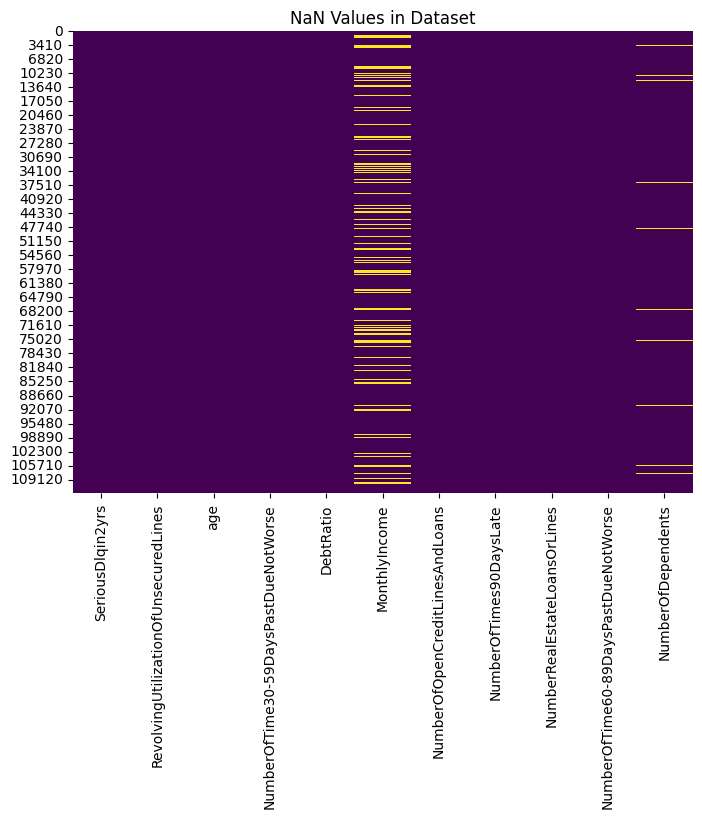

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
plt.title('NaN Values in Dataset')
plt.show()

In [ ]:
NanIncome = df[df['MonthlyIncome'].isnull()]
num_nan_dependents = NanIncome['NumberOfDependents'].isnull().sum()
print(num_nan_dependents)
# From the heatmap above and from this lines of code we understand that all the individuals with number of dependents missing, their
# monthlyIncome are also missing values.

2945


In [ ]:
NanIncome.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,22187.000000,22187.000000,22187.000000,22187.000000,22187.000000,0.0,22187.000000,22187.000000,22187.000000,22187.000000,19242.000000
mean,0.055393,7.336017,56.626899,0.602470,1689.514400,NaN,7.247037,0.509217,0.874386,0.478163,0.317015
std,0.228751,243.751694,15.458805,6.447955,4551.534473,NaN,4.872544,6.443728,1.041268,6.436026,0.808979
min,0.000000,0.000000,20.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.015585,46.000000,0.000000,122.000000,NaN,4.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.080365,57.000000,0.000000,1159.000000,NaN,6.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.438587,67.000000,0.000000,2385.000000,NaN,10.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,22198.000000,101.000000,98.000000,329664.000000,NaN,44.000000,98.000000,23.000000,98.000000,9.000000


In [ ]:
income_0 = df[df['MonthlyIncome'] == 0]
income_0

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
216,0.0,0.769231,46.0,1.0,51.0,0.0,5.0,1.0,0.0,0.0,0.0
277,0.0,0.000000,64.0,0.0,1834.0,0.0,9.0,0.0,3.0,0.0,0.0
413,0.0,0.127021,39.0,0.0,164.0,0.0,12.0,0.0,0.0,0.0,0.0
446,0.0,0.036884,56.0,0.0,900.0,0.0,5.0,0.0,1.0,0.0,0.0
692,0.0,0.941059,25.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
112212,0.0,0.413105,70.0,1.0,11902.0,0.0,23.0,0.0,3.0,0.0,0.0
112258,0.0,0.142844,46.0,0.0,968.0,0.0,8.0,0.0,2.0,0.0,0.0
112287,0.0,0.000000,68.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
112374,0.0,0.814461,62.0,0.0,2215.0,0.0,9.0,0.0,0.0,0.0,2.0


In [ ]:
income_0[income_0['NumberOfDependents'] == 0] # About 2/3 of individuals with 0 monthly income has 0 number of dependents

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
216,0.0,0.769231,46.0,1.0,51.0,0.0,5.0,1.0,0.0,0.0,0.0
277,0.0,0.000000,64.0,0.0,1834.0,0.0,9.0,0.0,3.0,0.0,0.0
413,0.0,0.127021,39.0,0.0,164.0,0.0,12.0,0.0,0.0,0.0,0.0
446,0.0,0.036884,56.0,0.0,900.0,0.0,5.0,0.0,1.0,0.0,0.0
692,0.0,0.941059,25.0,0.0,28.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
111686,1.0,0.276482,56.0,0.0,915.0,0.0,4.0,1.0,1.0,0.0,0.0
111802,0.0,0.186884,67.0,0.0,4184.0,0.0,11.0,0.0,1.0,0.0,0.0
112212,0.0,0.413105,70.0,1.0,11902.0,0.0,23.0,0.0,3.0,0.0,0.0
112258,0.0,0.142844,46.0,0.0,968.0,0.0,8.0,0.0,2.0,0.0,0.0


In [ ]:
income_0.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.0,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000
mean,0.040750,5.617606,48.287694,0.651182,1547.802771,0.0,7.095355,0.544417,0.708231,0.513447,0.706601
std,0.197791,169.193562,16.757250,6.849150,2720.450581,0.0,4.887298,6.851747,0.873550,6.841156,1.200318
min,0.000000,0.000000,20.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.020113,35.000000,0.000000,101.000000,0.0,3.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.106572,47.000000,0.000000,924.000000,0.0,6.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.471033,62.000000,0.000000,2127.500000,0.0,10.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,5893.000000,98.000000,98.000000,60212.000000,0.0,29.000000,98.000000,8.000000,98.000000,10.000000


Right off the bat, we can notice that the dataset is highly unbalanced. It imposes the question if this would have any effect on our classifier? After doing
some literature review, we came across various methods to handle this,namely oversampling as well as undersampling.

<ipython-input-61-350d41ae3592>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['30-59 days', '60-89 days', '≥90 days'])


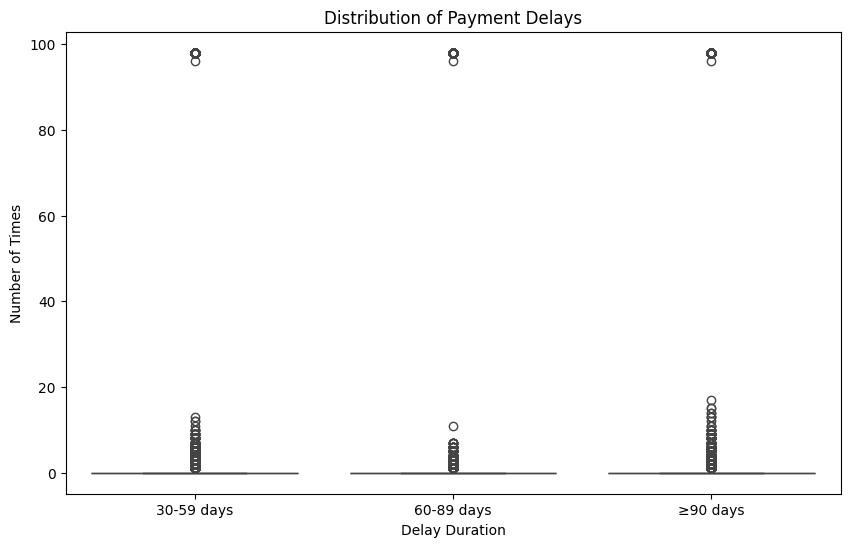

In [ ]:
# Create a copy of the dataframe
X1 = df.copy()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Create boxplots for each feature
sns.boxplot(data=X1[["NumberOfTime30-59DaysPastDueNotWorse", "NumberOfTime60-89DaysPastDueNotWorse", "NumberOfTimes90DaysLate"]], ax=ax)

# Set the x-tick labels
ax.set_xticklabels(['30-59 days', '60-89 days', '≥90 days'])

# Set the title and labels
ax.set_title('Distribution of Payment Delays')
ax.set_xlabel('Delay Duration')
ax.set_ylabel('Number of Times')

# Show the plot
plt.show()

# Identify the outliers
weirdos1 = X1[X1["NumberOfTime30-59DaysPastDueNotWorse"] > 20]
weirdos2 = X1[X1["NumberOfTime60-89DaysPastDueNotWorse"] > 20]
weirdos3 = X1[X1["NumberOfTimes90DaysLate"] > 20]

# Assert that the outliers are the same for all three features
assert (weirdos1.index == weirdos2.index).all()
assert (weirdos2.index == weirdos3.index).all()
assert (weirdos1["NumberOfTime30-59DaysPastDueNotWorse"] == weirdos2["NumberOfTime60-89DaysPastDueNotWorse"]).all()
assert (weirdos2["NumberOfTime60-89DaysPastDueNotWorse"] == weirdos3["NumberOfTimes90DaysLate"]).all()


In [ ]:
# Define a class to drop unnecessary columns
class NameDrop(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        # Drop the 'Unnamed: 0' column
        if 'Unnamed: 0' in X.columns:
          return X.drop(['Unnamed: 0'], axis = 1)
        return X

# Define a class to correct misinputs
class CorrectMisinput(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
        return self

    def transform(self, X):
        # Replace ages less than 19 with the mean age
        X.loc[X["age"] < 19, "age"] = X.age.mean()
        # Convert negative values to absolute values
        X[X[X.columns] < 0] = np.abs(X[X[X.columns] < 0])
        # Correct anomalies in payment delay data
        errors = X[X["NumberOfTime30-59DaysPastDueNotWorse"] > 30]["NumberOfTime30-59DaysPastDueNotWorse"]
        X.loc[X["NumberOfTime30-59DaysPastDueNotWorse"] > 30, "NumberOfTime30-59DaysPastDueNotWorse"] = X[X["NumberOfTime30-59DaysPastDueNotWorse"] < 30]["NumberOfTime30-59DaysPastDueNotWorse"].max() - np.array([int(np.random.exponential()) for i in range(len(errors))])
        # Repeat for other payment delay columns
        errors = X[X["NumberOfTime60-89DaysPastDueNotWorse"] > 30]["NumberOfTime60-89DaysPastDueNotWorse"]
        X.loc[X["NumberOfTime60-89DaysPastDueNotWorse"] > 30, "NumberOfTime60-89DaysPastDueNotWorse"] = X[X["NumberOfTime60-89DaysPastDueNotWorse"] < 30]["NumberOfTime60-89DaysPastDueNotWorse"].max() - np.array([int(np.random.exponential()) for i in range(len(errors))])
        errors = X[X["NumberOfTimes90DaysLate"] > 30]["NumberOfTimes90DaysLate"]
        X.loc[X["NumberOfTimes90DaysLate"] > 30, "NumberOfTimes90DaysLate"] = X[X["NumberOfTimes90DaysLate"] < 30]["NumberOfTimes90DaysLate"].max() - np.array([int(np.random.exponential()) for i in range(len(errors))])
        # Fill missing values in 'NumberOfDependents' with 0
        X.loc[X["NumberOfDependents"].isnull(), "NumberOfDependents"] = 0
        return X

# Define a class to impute missing values in 'MonthlyIncome'
class IncomeImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y = None):
            return self

    def transform(self, X):
        # Separate features and target
        features = X[X.columns[1:].drop("MonthlyIncome")]
        target = X['MonthlyIncome']
        data = pd.concat([target, features], axis=1)
        # Initialize the imputer
        imputer = IterativeImputer()
        # Perform imputation
        imputed_data = imputer.fit_transform(data)
        imputed_data_df = pd.DataFrame(imputed_data, columns=data.columns)
        # Post-processing: set negative imputations to 0
        imputed_data_df.loc[imputed_data_df['MonthlyIncome'] < 0, 'MonthlyIncome'] = 0
        # Replace the original 'MonthlyIncome' column with the imputed data
        X['MonthlyIncome'] = imputed_data_df['MonthlyIncome']
        return X

# Define the preprocessing pipeline
pipe = Pipeline([
    ("dropper", NameDrop()),
    ("misinput", CorrectMisinput()),
    ("imputer", IncomeImputer())
    ])

Imputed data characteristics: 
count    1.125000e+05
mean     5.830273e+03
std      1.272005e+04
min      0.000000e+00
25%      3.146350e+03
50%      4.717139e+03
75%      7.036337e+03
max      2.866006e+06
Name: MonthlyIncome, dtype: float64


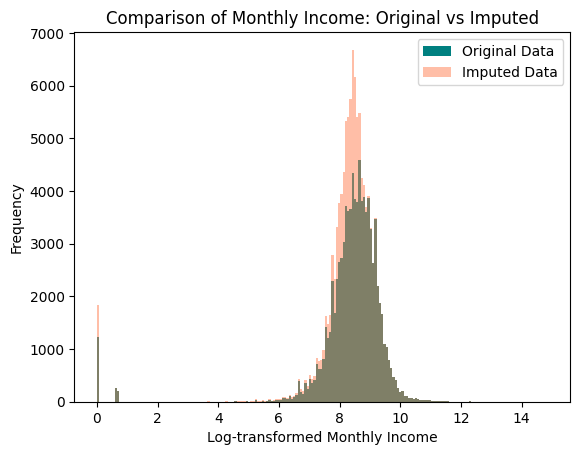

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jmuradyann/mlp/main/train.csv")
plt.clf()
imputed_data_df = pipe.fit_transform(df)

# Plots of both imputed and original data
plt.hist(np.log(df.MonthlyIncome + 1), bins = 200, alpha = 1, color = "teal", label='Original Data')
print(f'Imputed data characteristics: \n{imputed_data_df.MonthlyIncome.describe()}')
plt.hist(np.log(imputed_data_df.MonthlyIncome + 1), bins = 200, alpha = 0.5, color = "coral", label='Imputed Data')
plt.title("Comparison of Monthly Income: Original vs Imputed")
plt.xlabel("Log-transformed Monthly Income")
plt.ylabel("Frequency")
plt.legend()
plt.show()


Modeling

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/jmuradyann/mlp/main/train.csv")
df = pipe.fit_transform(df)
columns_drop_1 = ["SeriousDlqin2yrs", "NumberOfDependents"] #we used the feature importance method below to drop unimportant features ("NumberofDependents")
y = df["SeriousDlqin2yrs"]
X = df.drop(columns = columns_drop_1, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#we tried scaling the data but the performance detoriated
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

#CatBoost
# class_weights = [1, 5]  # Example weights for two classes (class 0 and class 1) picked using cross validation
# catboost_classifier = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=3, l2_leaf_reg=3, class_weights=class_weights, verbose = False) #The parameters have been tuned with the code below
# catboost_classifier.fit(X_train, y_train)
# feature_importance = catboost_classifier.get_feature_importance(data=None, type='FeatureImportance')
# print(feature_importance)
# y_prob = catboost_classifier.predict_proba(X_test)[:, 1]
# y_pred = catboost_classifier.predict(X_test)

# lgb_classifier = lgb.LGBMClassifier()
# lgb_classifier.fit(X_train, y_train)
# y_prob = lgb_classifier.predict_proba(X_test)[:, 1]
# y_pred = lgb_classifier.predict(X_test)

# # Xgboost
# xgb_classifier = xgb.XGBClassifier()
# xgb_classifier.fit(X_train, y_train)
# y_prob = xgb_classifier.predict_proba(X_test)[:, 1]
# y_pred = xgb_classifier.predict(X_test)

#We also performed the 10 fold validation over here. The ROC_AUC curves are run from the code below
# kf = KFold(n_splits=10)
# roc_auc_scores = cross_val_score(catboost_classifier, X, y, cv=kf, scoring='roc_auc')
# print("Mean ROC AUC score:", roc_auc_scores.mean())
# print("Standard deviation of ROC AUC score:", roc_auc_scores.std())

Confusion Matrix and ROC-AUC

0.5015972136939342


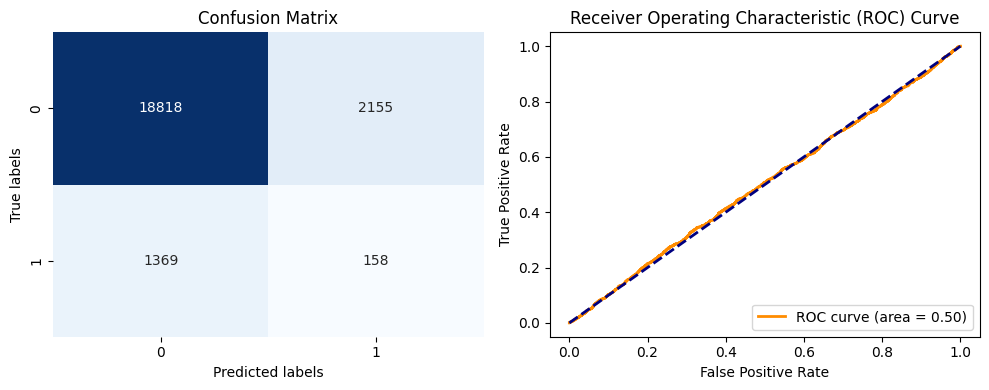

Precision: 0.0683
Recall: 0.1035
F1-score: 0.0823


In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
print(roc_auc)
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = auc(recall, precision)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

# Plot ROC curve
plt.subplot(1, 2, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

# plt.figure(figsize=(8, 6))
# plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.grid(True)
# plt.show()

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision: {:.4f}".format(precision))
print("Recall: {:.4f}".format(recall))
print("F1-score: {:.4f}".format(f1))

Models Tried but not used for final model

In [ ]:
# #SVM
# svm_classifier = SVC(kernel='poly', degree=2, probability=True, random_state=42)
# svm_classifier.fit(X_train_scaled, y_train)
# y_pred = svm_classifier.predict(X_test_scaled)
# y_prob = svm_classifier.predict_proba(X_test_scaled)[:, 1]

# #Logistic Regression
# model = LogisticRegression(max_iter=10000)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test
# y_prob = model.predict_proba(X_test)[:, 1]

# # Random Forest
# rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
# rf_classifier.fit(X_train, y_train)
# y_prob = rf_classifier.predict_proba(X_test)[:, 1]
# y_pred = rf_classifier.predict(X_test)

# # AdaBoost
# ada_classifier = AdaBoostClassifier(n_estimators=100)
# ada_classifier.fit(X_train, y_train)
# y_prob = rf_classifier.predict_proba(X_test)[:, 1]
# y_pred = rf_classifier.predict(X_test)

Hyperparameter Tuning Using GridSearch

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [3, 5, 7],
    'l2_leaf_reg': [1, 3, 5],
    'iterations': [100, 200, 300]
}

# Initialize CatBoost classifier
catboost_classifier = CatBoostClassifier(verbose = False)

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=catboost_classifier, param_grid=param_grid, cv=3, scoring='recall')
grid_search.fit(X_train, y_train)

# Print best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Train final CatBoost model with best parameters
best_params = grid_search.best_params_
final_catboost_model = CatBoostClassifier(**best_params)
final_catboost_model.fit(X_train, y_train)

# Compute AUC score
test_auc = roc_auc_score(y_test, y_pred_proba)
y_pred_proba = final_catboost_model.predict_proba(X_test)[:, 1]
test_auc = roc_auc_score(y_test, y_pred_proba)
print("Test AUC:", test_auc)

Test AUC: 0.8682689949915647


In [ ]:
param_grid = {
    'num_leaves': [20, 30, 40],
    'min_child_samples': [100, 200, 300],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0.1, 5, 10],
    'reg_lambda': [0.1, 10, 20]
}

# Initialize the LightGBM classifier
lgb_classifier = lgb.LGBMClassifier(objective='binary', metric='auc')

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid,
                           scoring='roc_auc', cv=3, verbose=1)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Print the best parameters found
print("Best parameters found: ", grid_search.best_params_)

# Get the best LightGBM classifier model
best_lgb_model = grid_search.best_estimator_

# Evaluate the best model
test_auc = roc_auc_score(y_test, best_lgb_model.predict_proba(X_test)[:, 1])
print("Test AUC: ", test_auc)

Mixing LightGBM and CatBoost

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train LighGBM model
lgbm_model = lgb.LGBMClassifier(verbose = 0, colsample_bytree = 0.7, min_child_samples = 200, num_leaves = 20, reg_alpha = 5, reg_lambda = 20, class_weight = {0:1, 1:3})
lgbm_model.fit(X_train, y_train)

# Train CatBoost model
class_weights = [1, 5]
catboost_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=7, l2_leaf_reg=5, class_weights=class_weights, verbose = False)
catboost_model.fit(X_train, y_train)

# Predict with each model
lgbm_preds = lgbm_model.predict_proba(X_test)[:, 1]
catboost_preds = catboost_model.predict_proba(X_test)[:, 1]

# Combine predictions (simple average)
ensemble_preds = (lgbm_preds + catboost_preds) / 2

# Evaluate ensemble performance
ensemble_roc_auc = roc_auc_score(y_test, ensemble_preds)
print("Ensemble ROC AUC:", ensemble_roc_auc)

Ensemble ROC AUC: 0.864728694842208


In [40]:
df_to_predict = pd.read_csv("https://raw.githubusercontent.com/jmuradyann/mlp/main/test.csv")
df_to_predict = pipe.fit_transform(df_to_predict)
columns_drop_1 = ["NumberOfDependents"]
df_to_predict = df_to_predict.drop(columns = columns_drop_1, axis=1)

# Train LightGBM model
lgbm_model = lgb.LGBMClassifier(verbose = 0, colsample_bytree = 0.7, min_child_samples = 200, num_leaves = 20, reg_alpha = 5, reg_lambda = 20, class_weight = {0:1, 1:3})
lgbm_model.fit(X, y)

# Train CatBoost model
class_weights = [1, 5]
catboost_model = CatBoostClassifier(iterations=300, learning_rate=0.05, depth=7, l2_leaf_reg=5, class_weights=class_weights, verbose = False)
catboost_model.fit(X, y)

# Predict with each model
lgbm_preds = lgbm_model.predict_proba(df_to_predict)[:, 1]
catboost_preds = catboost_model.predict_proba(df_to_predict)[:, 1]

# Combine predictions (simple average)
ensemble_preds = (lgbm_preds + catboost_preds) / 2

In [42]:
result_df = pd.DataFrame({
    'Probability': ensemble_preds
})
result_df.to_csv('ensemble_predictions_final.csv', index=True)
